# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Machine Learning in Python (III) - Neural Networks

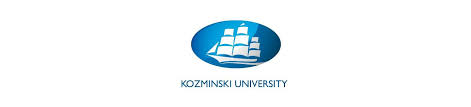
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In order to display the points we use the predefined (by us) `plot_decision` function.

In [ ]:
# the following means "from imports_for_ML.py import everything"
from imports_for_ML import *

%matplotlib inline

---

# Neural networks algorithms

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME - a WONDERFUL introduction to Artificial Neural Networks *************
<br>

https://www.3blue1brown.com/neural-networks

</div>

# Neural networks
Our plan:
* Introduction to the Keras library.
* The simplest neural network, equivalent of logistic regression
* Examples of neural network behavior with different number of neurons and layers for simple data with two predictive factors
* A neural network implemented on Titanic data

Then we will move on to the use of neural networks in image analysis.

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME *************
<br>

[Keras Explained](https://www.youtube.com/watch?v=j_pJmXJwMLA)

[Layers in a Neural Network explained](https://www.youtube.com/watch?v=FK77zZxaBoI)

</div>

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME *************
<br>

[Which Activation Function Should I Use? - VERY GOOD VIDEO about RELU!](https://www.youtube.com/watch?v=-7scQpJT7uo)

[Activation Functions in a Neural Network explained](https://www.youtube.com/watch?v=m0pIlLfpXWE)

</div>

`Keras` is the simplest library for neural networks in Python. It is high-level, which means that many details are done automatically, and allows us to focus on the "big picture". Keras is known for its well-designed API (programming interface), which makes it very convenient to use. Today we will use a simple sequential network (`Sequential`), for which subsequent layers are connected on a case-by-case basis (`Dense` type connection).  

Installing keras (from the `Anaconda Prompt` application): 

`conda install keras`

OR

`pip install keras`

---

We will import the appropriate objects first:

In [3]:
import tensorflow
tensorflow.__version__


from keras.models import Sequential
from keras.layers import Dense

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

We will also create an artificial dataset using the `make_moons` function. We would like to create `250` points, with a noise level of `0.25` and a `random_state` as `23` (to get similar results on the n-th run of our function):

</div>

In [5]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=___, noise=___, random_state=__)

ModuleNotFoundError: No module named 'sklearn'

We use the `plot_decision` function we already know to display the data we have created:

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

But this time we will check the correctness on the training and test data. Therefore, we divide the data into test and training data. Let the test data account for 25% of all data.

</div>

In [ ]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = 

## Creating a network

To create a sequential network, we first use `Sequential` - this way we will create an empty space (without layers yet) - to which we will "stick" the consequtive layers:

In [ ]:
model = Sequential()

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Apply a "dense" layer first. (`Dense`) - i.e. one in which each neuron is connected to each other in the previous layer.  
* The first argument for the `Dense` is the number of neurons - we want only one neuron for now.
* We also want to set the type of activation for the added layer; the activation determines how the neurons transform the incoming signal. Because this one added neuron will also be an output neuron, we want it to have an activation of the `'sigmoid'` type (like a logistic function) - i.e. a minimum value of 0 and a maximum of 1. The activity of this neuron will determine whether the point belongs to the blue group (value zero) or to the orange group (value one).
* The neuron added by us is simultaneously the output neuron and the first one adjacent to the data, therefore it needs to know what is the size of this data (`input_shape`). Our data has two predictors (values on the x-axis and values on the y-axis), so we give `input_shape=(2,)` (we give dimensions as a *tuple* type `(2,)`. Because the data could have e.g. height and width as in the case of photos, we would give `(height, width)`). 

</div>

In [ ]:
model.add(Dense(_, activation=_________, input_shape=(_,)))

To display a summary of the created model, use the `summary` method:

In [ ]:
model.summary()

Our first network is very modest - only 3 parameters.

Now we want to compile the model, i.e. prepare it to run. When compiling, we specify the cost function (`loss`), the optimization method (`optimizer`). We can also ask for some values to be calculated for the next steps of fitting the model (`metrics`).  
* We want the cost function to be `'binary_crossentropy'` (we will always use it for classification problems).
* Optimizer is set to `'adam'`, a popular optimization method that often leads to faster network learning.
* We also want to calculate the correctness for the next steps of network fit (`['accuracy']`)

In [ ]:
model.compile(loss=_________________, optimizer=______, metrics=['accuracy'])

Now we need to fit the model to the data, we use the familiar method `.fit` - we provide the training data to it: predictors and classifications. We also want to define how long the network is going to learn, most often we define it in the so-called epochs. One epoch is the use of all observations in training. Let us choose `250` epochs. Additionally, we use the `verbose` argument and set it to `0` in order not to clutter the screen with messages about training progress (for such small data the training will be very fast, we do not need information about progress).

In [ ]:
history = model.___(__________, _________, epochs=___, verbose=0)

After the fitting, we can retrieve the correctness information for the next matching steps (subsequent epochs) from the `history` variable.

In [ ]:
plt.plot(history.history['accuracy'])

If your correctness is below 80%, you can run the model fitting cell (`model.fit(...)`) again.

It is worth noting that the solution reached by the network is tantamount to the logistic regression that we have already learned.
This is because our network weighs predictors (values on the x and y axes in the graphic representation), adds up and transforms them logistically. Logistic regression does exactly the same - it selects weights for the predictors, adds up and transforms logistically. Logistic regression still has an `intercept`, but it is no different in the case of neural networks - every neuron has a so-called `bias`, which works exactly the same way as the `intercept`. As a result, we have implemented logistic regression using a neural network. We need more layers to be able to achieve better results.  
However, before we move on to adding layers, we will check what correctness we get on the test data:

In [ ]:
def show_correctness(X, y, clf, threshold=0.5):
    probabilities = clf.predict(X)[:, 0]
    predictions = (probabilities > threshold).astype('int')
    correctness = (predictions == y).mean()
    print('The correctness is: {:.2f}'.format(correctness))

In [ ]:
show_correctness(__________, __________, ______)

Time to increase model correctness. We will create a network with one hidden layer. We create the model the same way as before, we also create the output layer. Now, before we add the output layer, we add another layer with the following characteristics:
* 3 neurons
* Activation of the `relu` type

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME *************
<br>

[Which Activation Function Should I Use? - VERY GOOD VIDEO about RELU!](https://www.youtube.com/watch?v=-7scQpJT7uo)

</div>

In [ ]:
model = Sequential()
model.add(Dense(_, activation=________, input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

We compile and fit the model as before:

In [ ]:
model.compile(loss=_________________, optimizer=_______, metrics=___________)
history = model.fit(_____________, ____________, epochs=250, verbose=0)

In [ ]:
plt.plot(history.history['accuracy'])

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Now check the correctness of this network for the test data.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Create a model with two hidden layers: one with 8 neurons, the other with 2. Both hidden layers with activation of `'relu'` type.

</div>

In [ ]:
# creating model
model = Sequential()

# hidden layers
model.add(Dense(_, activation=______, input_shape=(2,)))
model.add(Dense(_, activation=______))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling, training, and plotting the accuracy history
model.compile(loss=_________________, optimizer=_______, metrics=___________)
history = model.fit(_____________, ____________, epochs=350, verbose=0)
plt.plot(history.history['accuracy'])

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Now check the correctness of this network for the test data.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Build the same model as in the first exercise, but now the second hidden layer should have 10 neurons.

</div>

In [ ]:
# here the code creating the network
model = ...


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=______, metrics=['accuracy'])
history = model.fit(X_moon_train, y_moon_train, epochs=350, verbose=0)
plt.plot(history.history['accuracy'])

In [ ]:
plot_decision(_________, __________, clf=model)

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Now check the correctness of this network for the test data.

</div>

Can you see what the correctness is right now???

# Back to the Titanic
First, create a network with two hidden layers - 10 neurons each.
We will now use titanic data; also note that we have a different number of predicators here, which we have to provide to `input_shape`:

In [ ]:
titanic_preproc = pd.read_csv('titanic_preproc.csv', index_col=0)

In [ ]:
y = sns.load_dataset('titanic').survived.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic_preproc.values, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [ ]:
X_train_std.shape

In [ ]:
# creating the model
model = Sequential()
model.add(Dense(_, activation=______, input_shape=(__,)))
model.add(Dense(_, activation=______))
model.add(Dense(1, activation='sigmoid'))

During model training we would like to see how the correctness of the test data changes with training.
We can do this by giving an additional argument of `validation_data` and setting it to `(X_test_std, y_test)`:

In [ ]:
# training and showing accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(________, ________, epochs=400, verbose=0,
                    validation_data=______________________________)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])

In [ ]:
print('Accuracy on the training data:')
show_correctness(X_train_std, y_train, model)

print('\Accuracy on the test data:')
show_correctness(X_test_std, y_test, model)

As in the case of previous algorithms, in the case of neural networks we are also dealing with hyperparameters. The most obvious hyperparameters of neural networks are: 
- the number of layers, 
- number of neurons in each layer,
- activation types,
- regularization (regular or dropout - but we will talk about it later), 
- finally: matching algorithm, learning rate (how big steps in the searched parameter space are performed) and others. 

We won't learn how to match hyperparameters for the network (apart from choosing the number of layers and neurons), but it's worth remembering that there is such a possibility. Professional applications of neural networks usually perform tests on many lists of hyperparameters (especially those hyperparameters that are not network architectures).